In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib qt
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
sys.path.append('../utils')
import Aircraft3dofApproxModel
import FinaltimeFreeCost
import Aircraft3dofConstraints
from scipy.integrate import solve_ivp
from SCP_buffer_deviation import SCP_buffer_deviation
from Scaling import TrajectoryScaling

In [111]:
ix = 6
iu = 3
tf = 600
N = 50
delT = tf/N
max_iter = 200

In [112]:
myModel = Aircraft3dofApproxModel.Aircraft3dofApproxModel('Hello',ix,iu,linearization="numeric_central")
myCost = FinaltimeFreeCost.Finaltime('Hello',ix,iu,N)
myConst = Aircraft3dofConstraints.Aircraft3dof('Hello',ix,iu)

x_min = np.zeros(ix)
x_max = np.array([110*1e3,60*1e3,10*1e3,240,np.deg2rad(20),np.pi/2])
u_min = np.array([0,0,0])
u_max = np.array([1.52,np.deg2rad(15),1126.3 * 1e3]) 

myScaling = TrajectoryScaling(x_min,x_max,u_min,u_max,tf)

In [113]:
xi = np.array([0*1e3,0*1e3,10*1e3,240,0,0])
xf = np.array([110*1e3,-60*1e3,0,95,-np.deg2rad(3),np.deg2rad(80)])
# xf = np.array([110*1e3,-0*1e3,0,95,-np.deg2rad(0),np.deg2rad(0)])

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf

u0 = np.zeros((N+1,iu))
ui = np.array([0.5,np.deg2rad(15),0])
uf = np.array([0.5,-np.deg2rad(-15),0])
for i in range(N+1) :
    u0[i] = (N-i)/N * ui + i/N * uf
# idx_c = int(26 * N / 50)
# for i in range(0,idx_c+1) :
#     u0[i,0] = (idx_c-i)/idx_c * 0.3 + i/idx_c * 0.15
# for i in range(idx_c+1,N+1) :
#     u0[i,0] = 1/700* (i-idx_c-1)**2 + 0.15

In [ ]:
# w_tr for time is 1
i1 = SCP_buffer_deviation('hello',N,tf,max_iter,myModel,myCost,myConst,myScaling,
          type_discretization="foh",w_c=1,w_bf=1e6,w_bf_b=1e6,w_tr=1e3,tol_bf=1e-6,tol_tr=1e-6,tol_bc=1)
x,u,xbar,ubar,Tbar,total_num_iter,flag_boundary,l,l_vc,l_tr,x_traj,u_traj  = i1.run(x0,u0,xi,xf)



iteration   total_cost        cost        ||bf||     ||tr||       reduction   w_tr        bounary
1           99616.123         516.00000   0.00019     98.9        -9.9e+04    1000.000000 0(2.19e+05)
2           32848.794         595.86016   6.75e-05    32.2        6.68e+04    1000.000000 0(2.76e+07)
3           5668.423          567.05065   1.79e-06    5.1         2.72e+04    1000.000000 0(2.14e+04)
4           1277.081          613.09940   4.29e-07    0.664       4.39e+03    1000.000000 0(654)
5           618.544           611.03590   1.54e-09    0.00751     659         1000.000000 0(12.8)
6           609.652           608.08907   1.81e-09    0.00156     8.89        1000.000000 0(2.94)
7           606.653           605.19050   1.83e-09    0.00146     3           1000.000000 0(2.37)
8           603.846           602.47601   2.01e-09    0.00137     2.81        1000.000000 0(2.17)
9           601.173           599.84442   2.03e-09    0.00133     2.67        1000.000000 0(2.03)
10       

84          541.488           541.45112   1.78e-09    3.47e-05    0.0727      1000.000000 0(1.43)
85          541.419           541.38253   1.79e-09    3.44e-05    0.0689      1000.000000 0(1.43)
86          541.350           541.31443   1.79e-09    3.41e-05    0.0683      1000.000000 0(1.43)
87          541.282           541.24676   1.79e-09    3.39e-05    0.0679      1000.000000 0(1.42)
88          541.216           541.18274   1.79e-09    3.15e-05    0.0664      1000.000000 0(1.42)
89          541.154           541.12090   1.78e-09    3.1e-05     0.0624      1000.000000 0(1.41)
90          541.092           541.06096   1.78e-09    2.97e-05    0.0612      1000.000000 0(1.41)
91          541.033           541.00238   1.77e-09    2.93e-05    0.059       1000.000000 0(1.41)
92          540.975           540.94392   1.76e-09    2.92e-05    0.0585      1000.000000 0(1.41)
93          540.916           540.88553   1.76e-09    2.92e-05    0.0584      1000.000000 0(1.4)
94          540.858  

In [121]:
print(np.sum(Tbar))

527.1378014674257


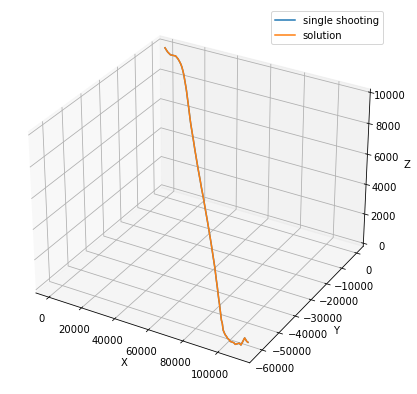

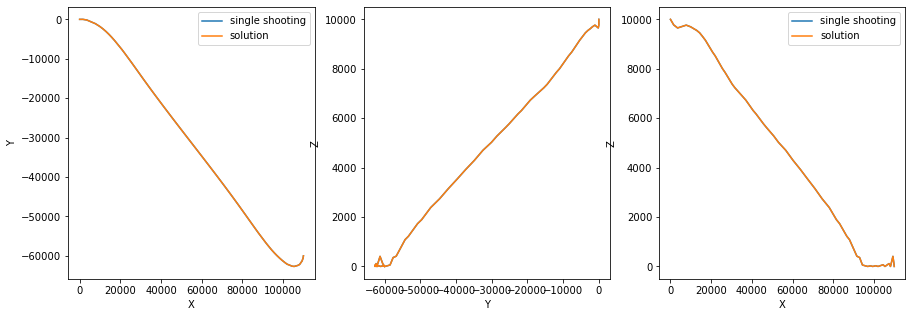

In [122]:
t_index = [np.sum(Tbar[:i])  for i in range(N+1)]
fig = plt.figure(1,figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot(x[:, 0], x[:, 1], x[:, 2],label='single shooting')
ax.plot(xbar[:, 0], xbar[:, 1], xbar[:, 2],label='solution')
plt.legend()
fig = plt.figure(2,figsize=(15,5))
ax = fig.add_subplot(131)
ax.plot(x[:, 0], x[:, 1],label='single shooting')
ax.plot(xbar[:, 0], xbar[:, 1],label='solution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.legend()
ax = fig.add_subplot(132)
ax.plot(x[:, 1], x[:, 2],label='single shooting')
ax.plot(xbar[:, 1], xbar[:, 2],label='solution')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax = fig.add_subplot(133)
ax.plot(x[:, 0], x[:, 2],label='single shooting')
ax.plot(xbar[:, 0], xbar[:, 2],label='solution')
ax.set_xlabel('X')
ax.set_ylabel('Z')
plt.legend()
# ax.plot(xbar[:, 0], xbar[:, 1], xbar[:, 2],'o')

In [123]:
np.abs(x[-1] - xbar[-1])

array([6.59714508e-01, 1.19193286e+00, 3.18822787e-03, 1.64506133e-05,
       8.78011130e-07, 1.09801921e-05])

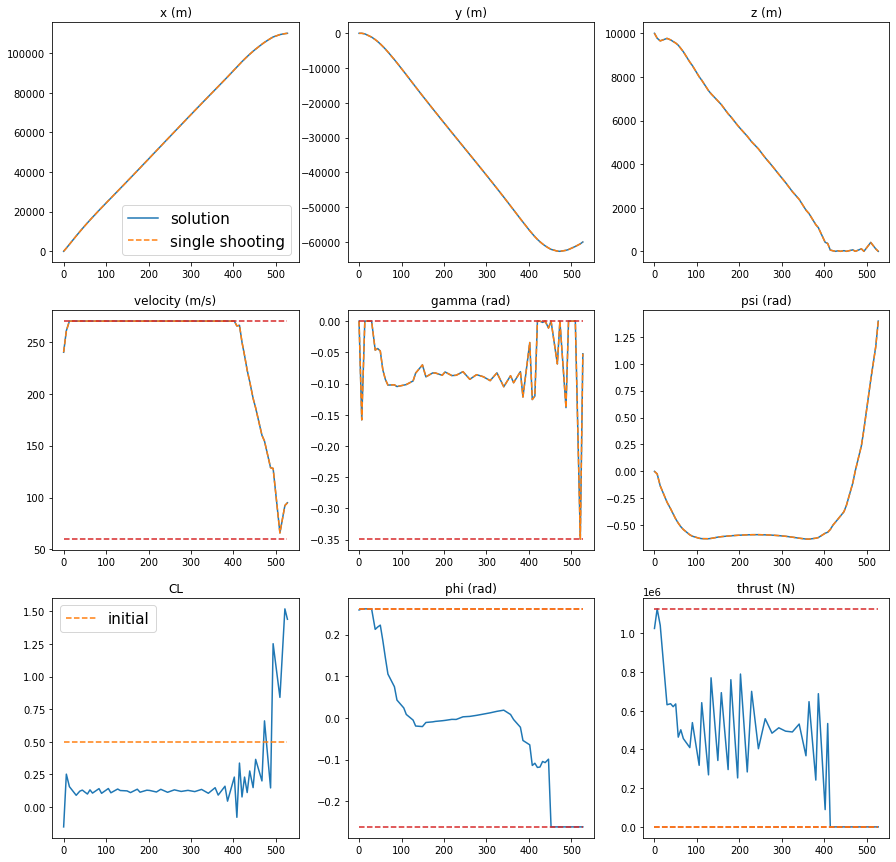

In [124]:
plt.figure(figsize=(15,15))
plt.subplot(331)
plt.plot(t_index,xbar[:,0],label='solution')
plt.plot(t_index,x[:,0],'--',label='single shooting')
plt.legend(fontsize=15)
plt.title('x (m)')

plt.subplot(332)
plt.plot(t_index,xbar[:,1])
plt.plot(t_index,x[:,1],'--')
plt.title('y (m)')

plt.subplot(333)
plt.plot(t_index,xbar[:,2])
plt.plot(t_index,x[:,2],'--')
plt.title('z (m)')


plt.subplot(334)
plt.plot(t_index,xbar[:,3])
plt.plot(t_index,x[:,3],'--')
plt.plot(t_index,ubar[:,2]*0 + myConst.v_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.v_min,'--',color='tab:red')
plt.title('velocity (m/s)')

plt.subplot(335)
plt.plot(t_index,xbar[:,4])
plt.plot(t_index,x[:,4],'--')
plt.plot(t_index,ubar[:,2]*0 + myConst.gamma_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.gamma_min,'--',color='tab:red')
plt.title('gamma (rad)')

plt.subplot(336)
plt.plot(t_index,xbar[:,5])
plt.plot(t_index,x[:,5],'--')
plt.title('psi (rad)')

plt.subplot(337)
plt.plot(t_index,ubar[:,0],'-')
# plt.plot(t_index,ubar[:,2]*0 + myConst.CL_max,'--',color='tab:red')
# plt.plot(t_index,ubar[:,2]*0 + myConst.CL_min,'--',color='tab:red')
plt.title('CL')
plt.plot(t_index,u0[:,0],'--',label='initial')
plt.legend(fontsize=15)
plt.subplot(338)
plt.plot(t_index,ubar[:,1],'-')
plt.plot(t_index,ubar[:,2]*0 + myConst.phi_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.phi_min,'--',color='tab:red')
plt.title('phi (rad)')
plt.plot(t_index,u0[:,1],'--',label='initial')
plt.subplot(339)
plt.plot(t_index,ubar[:,2],'-')
plt.plot(t_index,ubar[:,2]*0 + myConst.T_max,'--',color='tab:red')
plt.plot(t_index,ubar[:,2]*0 + myConst.T_min,'--',color='tab:red')
plt.title('thrust (N)')
plt.plot(t_index,u0[:,2],'--',label='initial')

In [ ]:
T = 15.04 - 0.00649 * xbar[:,2] # celsius
p = 101.29 * np.power((T+273.1)/288.08,5.256)
rho = p / (0.2869 * (T + 273.1))

F_lift = 0.5 * rho * xbar[:,3] * xbar[:,3] * myModel.Sw * ubar[:,0]
F_draf = 0.5 * rho * xbar[:,3] * xbar[:,3] * myModel.Sw * (myModel.CD0 + myModel.K  * ubar[:,0] * ubar[:,0])

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(t_index,rho)

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(338)
plt.plot(t_index,F_lift)
plt.title('Lift force (N)')

plt.subplot(339)
plt.plot(t_index,F_draf)
plt.title('Drag force (N)')

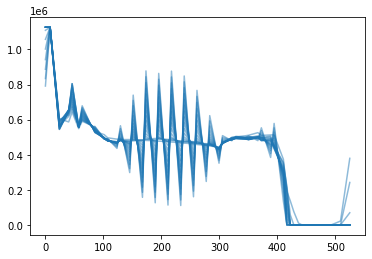

In [110]:
for ubar_ in u_traj[3:20] :
    plt.plot(t_index,ubar_[:,2],alpha=0.5,color='tab:blue')
# plt.title('CL')

In [ ]:
a = np.random.randn(3,2,3)
print(a)
print()
b = np.array([1,2,3])
print((a.T*b).T)